In [4]:
import pandas as pd
import numpy as np


In [236]:
MSFT = pd.read_csv('MSFT.csv')
MSFT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,54.320000,54.799999,53.389999,54.799999,49.891834,53778000
1,2016-01-05,54.930000,55.389999,54.540001,55.049999,50.119446,34079700
2,2016-01-06,54.320000,54.400002,53.639999,54.049999,49.209011,39518900
3,2016-01-07,52.700001,53.490002,52.070000,52.169998,47.497398,56564900
4,2016-01-08,52.369999,53.279999,52.150002,52.330002,47.643063,48754000
...,...,...,...,...,...,...,...
1326,2021-04-12,254.710007,257.670013,254.619995,255.910004,255.910004,27148700
1327,2021-04-13,257.260010,259.190002,256.829987,258.489990,258.489990,23837500
1328,2021-04-14,257.480011,258.829987,255.160004,255.589996,255.589996,23070900
1329,2021-04-15,257.929993,259.929993,257.730011,259.500000,259.500000,25627500


In [237]:
df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,54.320000,54.799999,53.389999,54.799999,49.891834,53778000
1,2016-01-05,54.930000,55.389999,54.540001,55.049999,50.119446,34079700
2,2016-01-06,54.320000,54.400002,53.639999,54.049999,49.209011,39518900
3,2016-01-07,52.700001,53.490002,52.070000,52.169998,47.497398,56564900
4,2016-01-08,52.369999,53.279999,52.150002,52.330002,47.643063,48754000


In [238]:
df.set_index('Date', inplace = True)


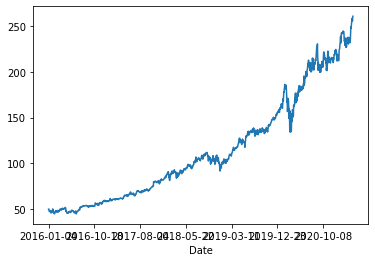

In [315]:
df['Adj Close'].plot()

In [316]:
data=df.copy()

In [317]:
data.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [318]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [319]:
lag_features=['High', 'Low', 'Volume']
window1=3
window2=7

In [320]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [321]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [322]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.891834,53778000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,54.930000,55.389999,54.540001,55.049999,50.119446,34079700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,54.320000,54.400002,53.639999,54.049999,49.209011,39518900,54.863333,NaN,53.856666,NaN,4.245887e+07,NaN,0.498028,NaN,0.604843,NaN,1.017292e+07,NaN
2016-01-07,52.700001,53.490002,52.070000,52.169998,47.497398,56564900,54.426668,NaN,53.416667,NaN,4.338783e+07,NaN,0.950279,NaN,1.250054,NaN,1.173126e+07,NaN
2016-01-08,52.369999,53.279999,52.150002,52.330002,47.643063,48754000,53.723334,NaN,52.620000,NaN,4.827927e+07,NaN,0.595344,NaN,0.884250,NaN,8.532910e+06,NaN


In [323]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [324]:
data.shape

(1331, 18)

In [325]:
data.isna().sum()

Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
Highrolling_mean_3      2
Highrolling_mean_7      6
Lowrolling_mean_3       2
Lowrolling_mean_7       6
Volumerolling_mean_3    2
Volumerolling_mean_7    6
Highrolling_std_3       2
Highrolling_std_7       6
Lowrolling_std_3        2
Lowrolling_std_7        6
Volumerolling_std_3     2
Volumerolling_std_7     6
dtype: int64

In [326]:
data.dropna(inplace=True)

In [327]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [328]:
ind_features=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7']

In [329]:
training_data=data[0:1000]
test_data=data[1000:]

In [330]:
training_data

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,
2016-01-12,52.759998,53.099998,52.060001,52.779999,48.052753,36095500,53.076665,53.901428,51.890001,52.758572,4.059777e+07,4.367640e+07,0.215948,0.963941,0.375101,1.108143,7.076229e+06,9.184382e+06
2016-01-13,53.799999,54.070000,51.299999,51.639999,47.014870,66883600,53.339999,53.797143,51.606666,52.460000,4.664097e+07,4.554863e+07,0.644439,0.886937,0.400667,1.188318,1.753577e+07,1.237007e+07
2016-01-14,52.000000,53.419998,51.570000,53.110001,48.353203,52381900,53.529999,53.515714,51.643333,52.035714,5.178700e+07,4.816323e+07,0.494268,0.543228,0.385271,0.782961,1.540267e+07,1.144128e+07
2016-01-15,51.310001,51.970001,50.340000,50.990002,46.423088,71820700,53.153333,53.168571,51.070000,51.564286,6.369540e+07,5.277777e+07,1.075096,0.649908,0.646452,0.635633,1.010397e+07,1.367059e+07
2016-01-19,51.480000,51.680000,50.060001,50.560001,46.031593,43564500,52.356666,52.909999,50.656667,51.277143,5.592237e+07,5.092057e+07,0.932218,0.834545,0.803264,0.801472,1.445698e+07,1.395055e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,157.479996,157.710007,157.119995,157.380005,155.372406,8989200,158.106669,156.740001,156.893331,155.411427,2.672830e+07,2.554897e+07,0.390170,1.304020,0.527862,1.454664,2.357305e+07,1.366200e+07
2019-12-26,157.559998,158.729996,157.399994,158.669998,156.645950,14520600,158.186666,157.144287,157.263331,155.779997,1.374267e+07,2.417417e+07,0.513253,1.432547,0.140119,1.599479,4.416191e+06,1.429641e+07
2019-12-27,159.449997,159.550003,158.220001,158.960007,156.932251,18412800,158.663335,157.692858,157.579997,156.318569,1.397420e+07,2.317234e+07,0.921807,1.524082,0.571668,1.708035,4.735501e+06,1.443910e+07


In [272]:
!pip install pmdarima

In [331]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,158.571075,22622100,159.173335,158.804286,157.169998,157.359998,1.911330e+07,1.671153e+07,1.485941,1.084124,1.014301,0.703896,3.202322e+06,4.206295e+06
2020-01-03,158.320007,159.949997,158.059998,158.619995,156.596588,21116200,159.483332,159.065715,157.613332,157.472855,2.070257e+07,1.719696e+07,1.534184,1.111900,1.016483,0.748951,2.156313e+06,4.525773e+06
2020-01-06,157.080002,159.100006,156.509995,159.029999,157.001373,20813700,159.926666,159.264287,157.633332,157.385712,2.151733e+07,1.888617e+07,0.815245,0.940314,0.982161,0.828150,9.686375e+05,2.847080e+06
2020-01-07,159.320007,159.669998,157.320007,157.580002,155.569855,21634100,159.573334,159.398573,157.296667,157.374285,2.118800e+07,1.990239e+07,0.433162,0.918155,0.775265,0.828472,4.148861e+05,2.232310e+06
2020-01-08,158.929993,160.800003,157.949997,160.089996,158.047836,27746500,159.856669,159.577144,157.260000,157.335713,2.339810e+07,2.123577e+07,0.865235,1.062694,0.721874,0.787823,3.788100e+06,3.576895e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,254.710007,257.670013,254.619995,255.910004,255.910004,27148700,255.933339,251.561430,253.019999,247.697143,2.502987e+07,2.685199e+07,1.765689,4.954368,1.402994,5.886409,1.867161e+06,5.204523e+06
2021-04-13,257.260010,259.190002,256.829987,258.489990,258.489990,23837500,257.616673,253.897145,254.629995,250.379998,2.510063e+07,2.592706e+07,1.600665,3.899088,2.195010,4.964145,1.789721e+06,5.060457e+06
2021-04-14,257.480011,258.829987,255.160004,255.589996,255.589996,23070900,258.563334,255.164285,255.536662,252.159999,2.468570e+07,2.394996e+07,0.794304,3.847287,1.152137,3.863151,2.167186e+06,1.516922e+06


In [332]:
from pmdarima import auto_arima

In [333]:
import warnings
warnings.filterwarnings('ignore')

In [334]:
model=auto_arima(y=training_data['Adj Close'], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-21139.114, Time=2.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21147.974, Time=1.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-21145.018, Time=1.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-21145.693, Time=2.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-21149.974, Time=1.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-21143.015, Time=2.45 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 11.971 seconds


In [335]:
model.fit(training_data['Close'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [336]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [337]:
test_data['Forecast_ARIMA']=forecast

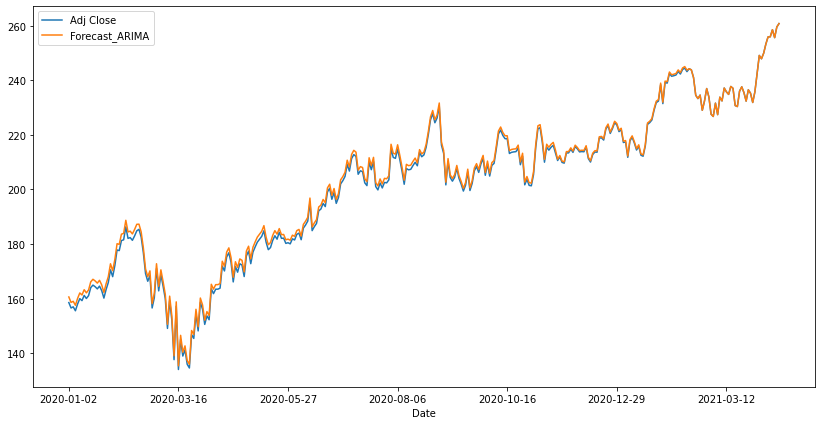

In [338]:
test_data[['Adj Close','Forecast_ARIMA']].plot(figsize=(14,7))